In [1]:
import numpy as np
import ROOT as r
import sys

Welcome to JupyROOT 6.26/02


In [2]:
sys.path.append("../")
import Cnn_toolr
import Reg_tool

In [3]:
lr = 3

### train dataset

In [4]:
# read npy
tloss = np.load(f"./train_dataset/Conv3D_result/tloss{lr}.npy")
vloss = np.load(f"./train_dataset/Conv3D_result/vloss{lr}.npy")

FileNotFoundError: [Errno 2] No such file or directory: './train_dataset/Conv3D_result/tloss3.npy'

In [ ]:
print(vloss.argmin(), vloss.min())
print(vloss[vloss!=vloss.min()].argmin(), vloss[vloss!=vloss.min()].min())

79 0.011956181
60 0.012085285


Info in <TCanvas::Print>: pdf file loss.pdf has been created


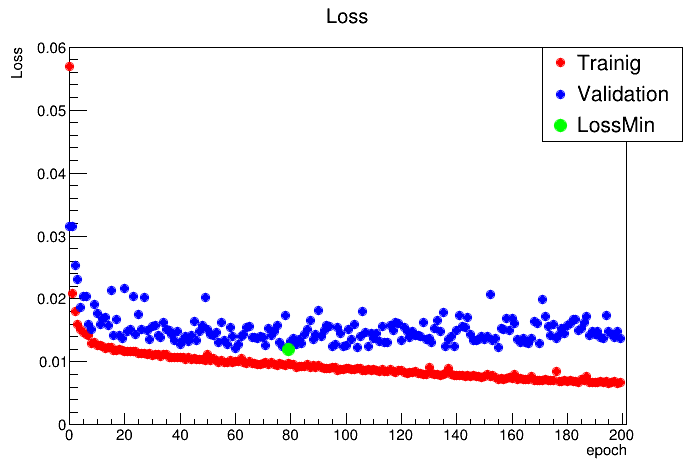

In [ ]:
c_loss = r.TCanvas("c_loss")
tmg_loss, leg_loss = Cnn_toolr.plot_loss(tloss, vloss, "tmg_loss")
g1_loss = r.TGraph(2, -np.ones(2).astype(np.double), np.zeros(2).astype(np.double))
g1_loss.SetPoint(1, (vloss.astype(np.double).argmin()), (vloss.astype(np.double).min()))
g1_loss.SetMarkerColor(3)
g1_loss.SetMarkerStyle(20)
g1_loss.SetMarkerSize(1.5)
tmg_loss.Add(g1_loss)
leg_loss.AddEntry(g1_loss, "LossMin", "P")
tmg_loss.GetXaxis().SetRangeUser(0, 201)
tmg_loss.GetYaxis().SetRangeUser(0, 0.06)
tmg_loss.Draw("AP")
leg_loss.Draw()
c_loss.Draw()
c_loss.SaveAs("loss.pdf")

### retesut result

In [5]:
result = r.TFile(f"analysis_3D_{lr}lr.root")
result.ls()

TFile**		analysis_3D_3lr.root	
 TFile*		analysis_3D_3lr.root	
  KEY: TH1D	h1_regenergy0;1	Regression Energy in 2GeV
  KEY: TF1	f1_regenergy0;1	gaus
  KEY: TH1D	h1_regenergy1;1	Regression Energy in 4GeV
  KEY: TF1	f1_regenergy1;1	gaus
  KEY: TH1D	h1_regenergy2;1	Regression Energy in 6GeV
  KEY: TF1	f1_regenergy2;1	gaus
  KEY: TH1D	h1_regenergy3;1	Regression Energy in 8GeV
  KEY: TF1	f1_regenergy3;1	gaus
  KEY: TH1D	h1_regenergy4;1	Regression Energy in 10GeV
  KEY: TF1	f1_regenergy4;1	gaus
  KEY: TH1D	h1_regenergy5;1	Regression Energy in 12GeV
  KEY: TF1	f1_regenergy5;1	gaus
  KEY: TH1D	h1_regenergy6;1	Regression Energy in 14GeV
  KEY: TF1	f1_regenergy6;1	gaus
  KEY: TH1D	h1_regenergy7;1	Regression Energy in 16GeV
  KEY: TF1	f1_regenergy7;1	gaus
  KEY: TH1D	h1_regenergy8;1	Regression Energy in 18GeV
  KEY: TF1	f1_regenergy8;1	gaus
  KEY: TH1D	h1_regenergy9;1	Regression Energy in 20GeV
  KEY: TF1	f1_regenergy9;1	gaus
  KEY: TH1D	h1_regenergy10;1	Regression Energy in 22GeV
  KEY: TF1	f1_re

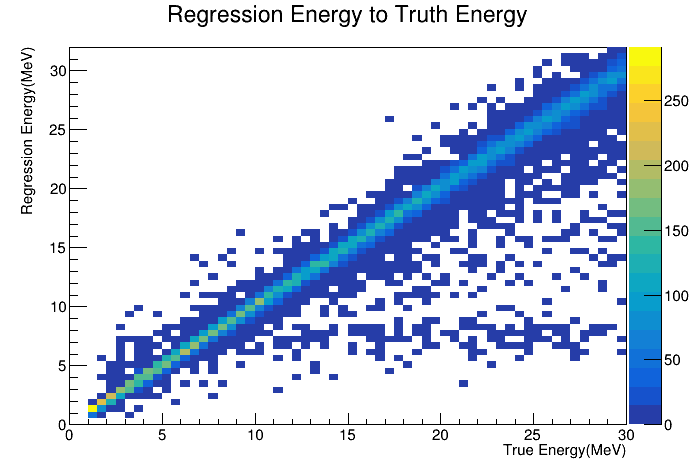

In [6]:
c_labelreg = r.TCanvas("c_labelreg")
h2_labelreg = result.Get("h2_labelreg")
r.gStyle.SetOptStat(0)
h2_labelreg.Draw("colz")
c_labelreg.Draw()

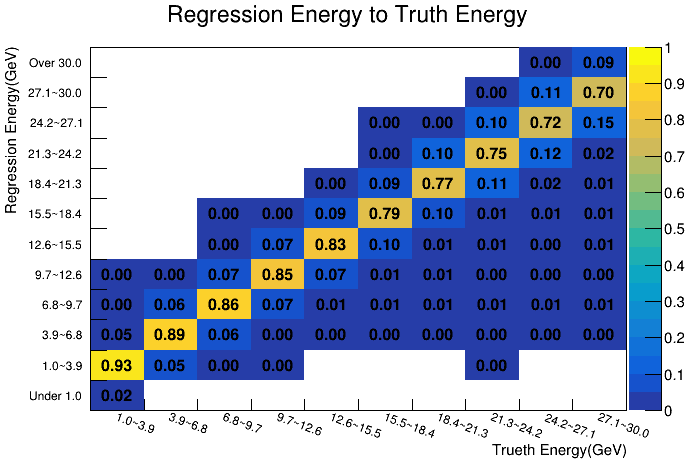

In [7]:
c_labelreg_ratio = r.TCanvas("c_labelreg_ratio")
h2_labelreg_ratio = result.Get("h2_labelreg_ratio")
r.gStyle.SetPaintTextFormat(".2f")
r.gStyle.SetOptStat(0)
h2_labelreg_ratio.SetMarkerSize(1.8)
h2_labelreg_ratio.Draw("colz TEXT")
c_labelreg_ratio.SetBottomMargin(0.13)
c_labelreg_ratio.SetLeftMargin(0.13)
c_labelreg_ratio.Draw()

### test dataset

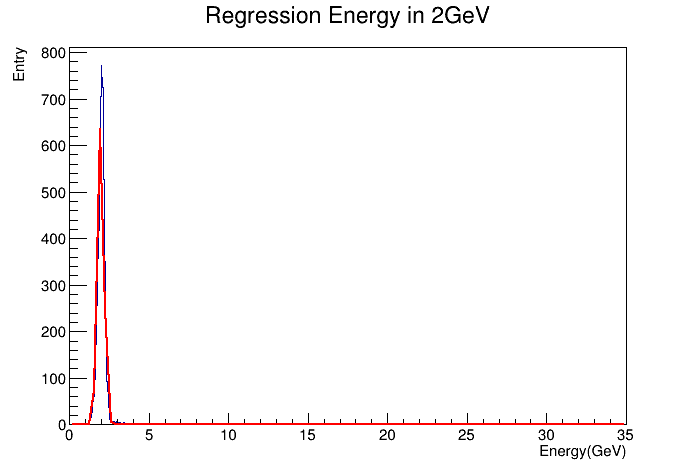

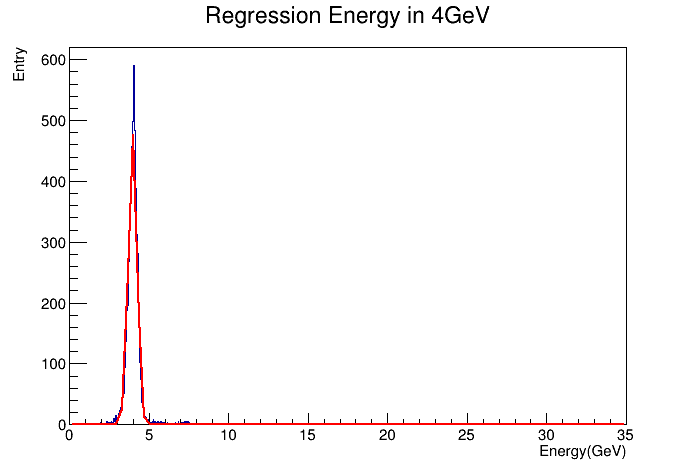

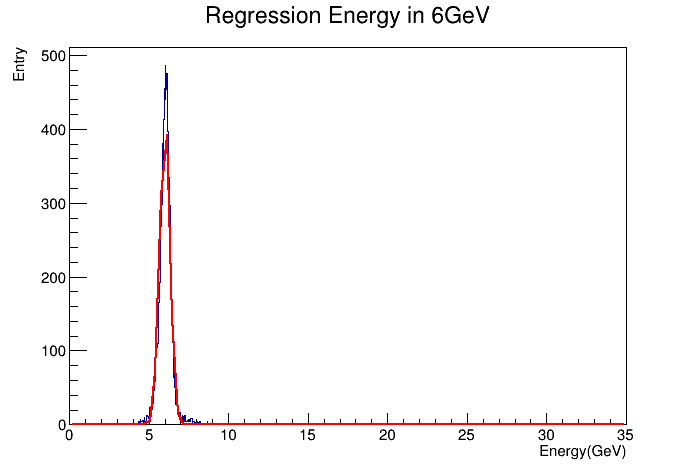

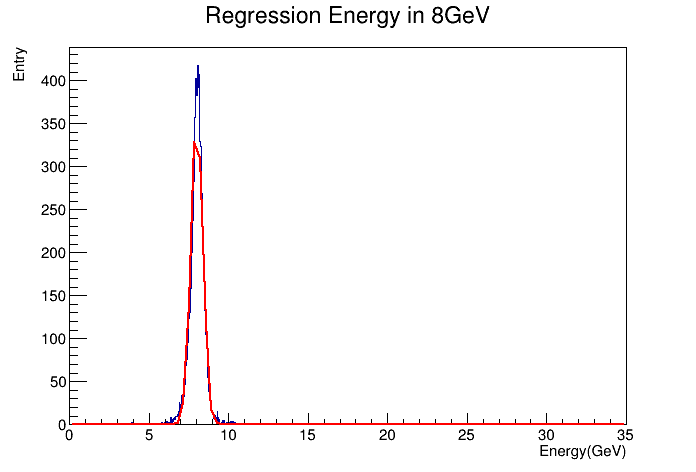

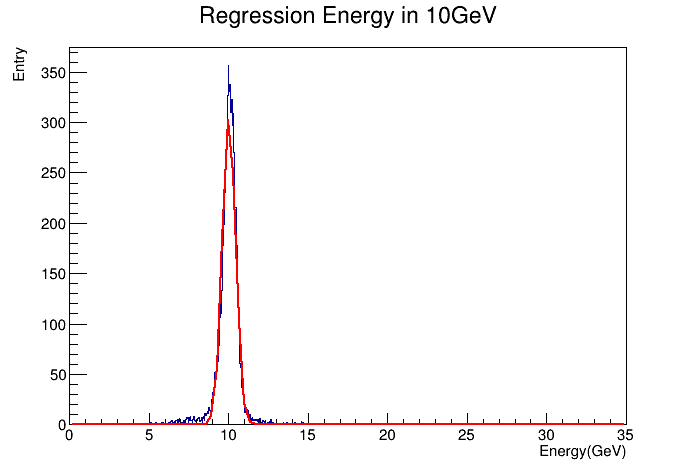

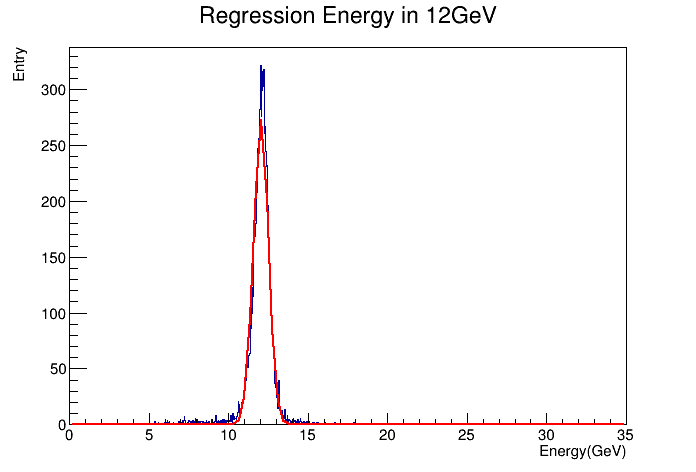

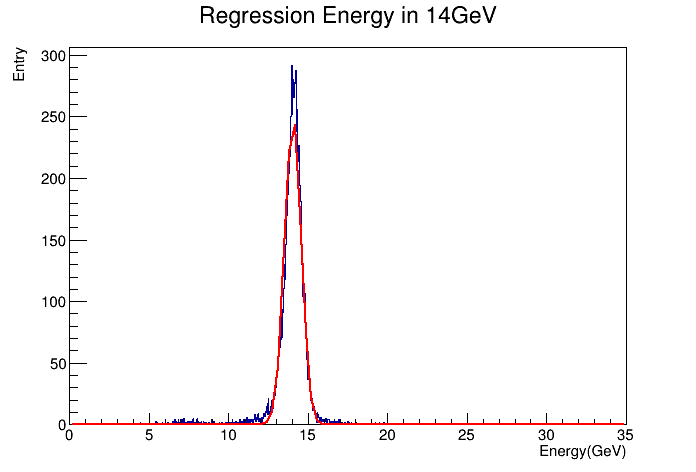

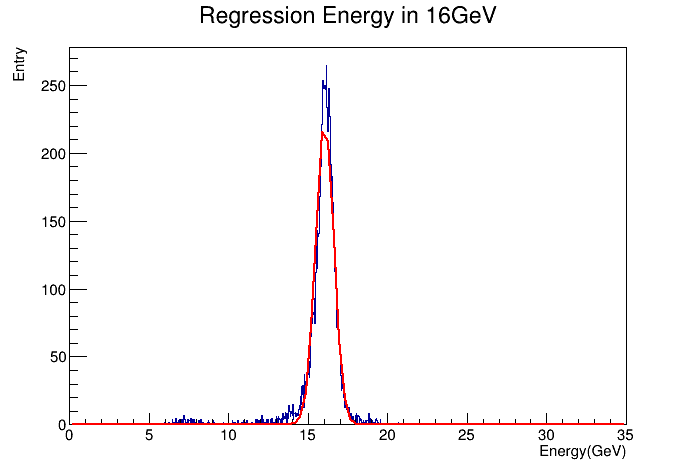

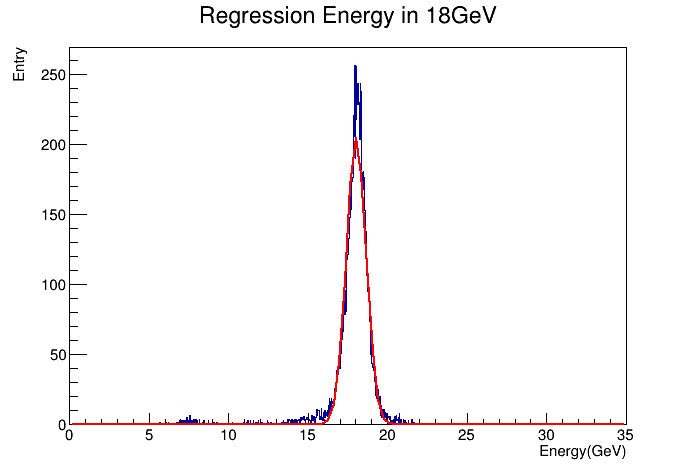

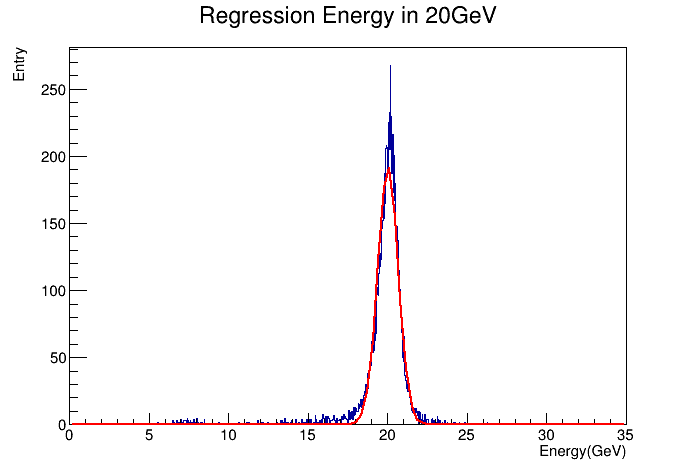

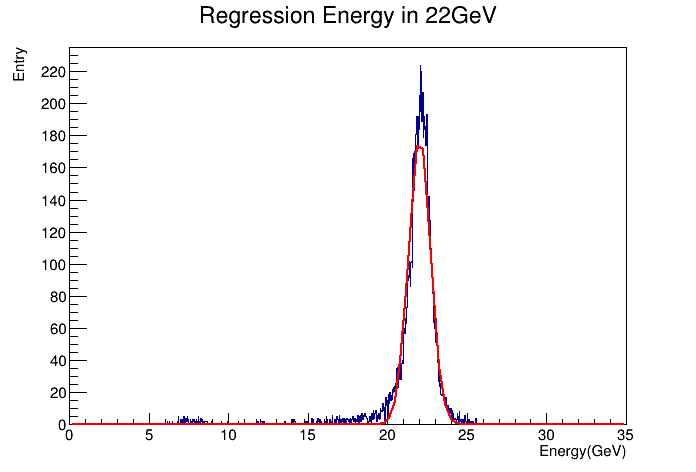

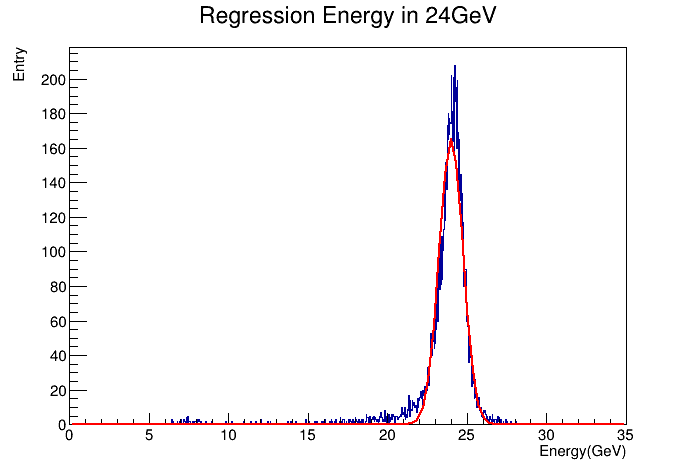

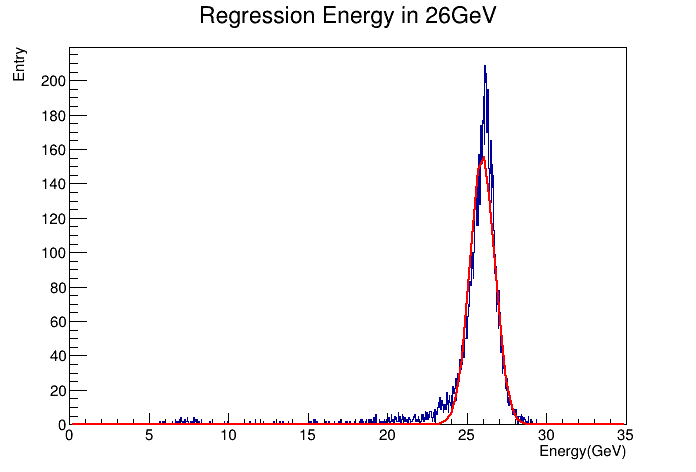

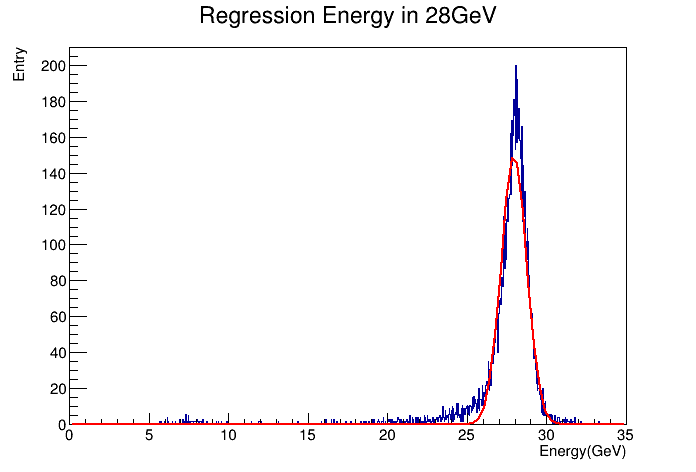

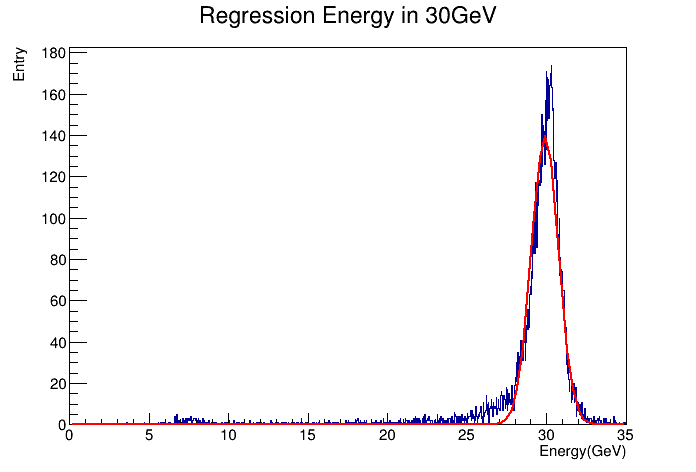

In [8]:
h1_drawop = "HIST"
f1_drawop = "same"
r.gStyle.SetOptFit(0)
r.gStyle.SetOptStat(0)
for i in range(15):
    canvas = f"c_energy{i}"
    exec(f"c_energy{i} = r.TCanvas(canvas)")
    h1_label = f"h1_regenergy{i}"
    f1_label = f"f1_regenergy{i}"
    exec(f"h1_energy{i} = result.Get(h1_label)")
    exec(f"f1_energy{i} = result.Get(f1_label)")
    exec(f"h1_energy{i}.Draw(h1_drawop)")
    exec(f"f1_energy{i}.Draw(f1_drawop)")
    exec(f"c_energy{i}.Draw()")

 FCN=159.727 FROM MIGRAD    STATUS=CONVERGED      80 CALLS          81 TOTAL
                     EDM=3.12297e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.28302e-01   7.68444e-04   2.50416e-06  -5.23199e-01
   2  p1           1.53064e-02   4.00790e-04   1.30624e-06  -5.21283e-01


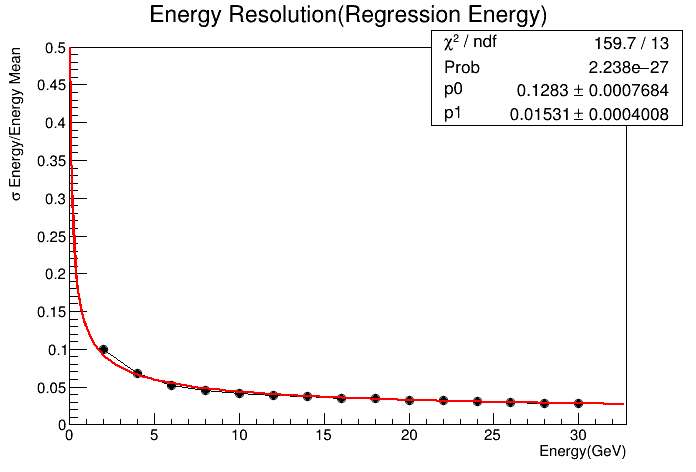

In [9]:
c_resolution = r.TCanvas("c_resolution")
g1_resolution = result.Get("g1_resolution")
f1_resolution = r.TF1("f1_resolution", "sqrt([0]**2/x+[1]**2)")
g1_resolution.Fit("f1_resolution")
r.gStyle.SetOptFit(1111)
g1_resolution.Draw("APL")
f1_resolution.Draw("same")
c_resolution.Draw()

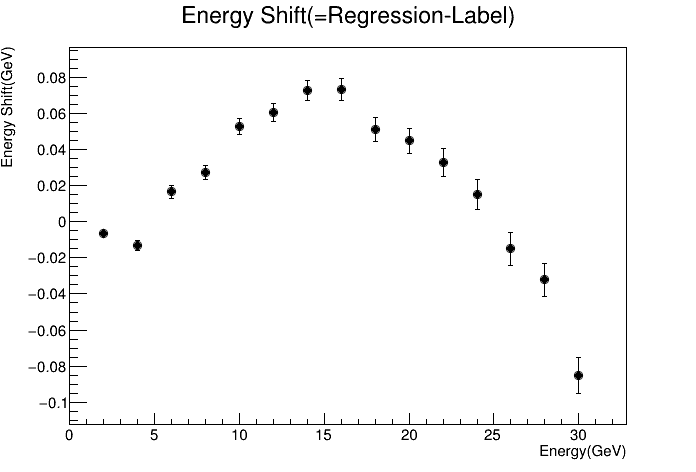

In [10]:
c_meanshift = r.TCanvas("c_meanshift")
g1_meanshift = result.Get("g1_meanshift")
g1_meanshift.Draw("AP")
c_meanshift.Draw()

 FCN=662.202 FROM MIGRAD    STATUS=CONVERGED      40 CALLS          41 TOTAL
                     EDM=4.44618e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.00140e+00   1.59266e-04   3.00000e-06  -3.89377e-05
   2  p1           2.94052e-03   1.76585e-03   1.62784e-05   2.16501e-06


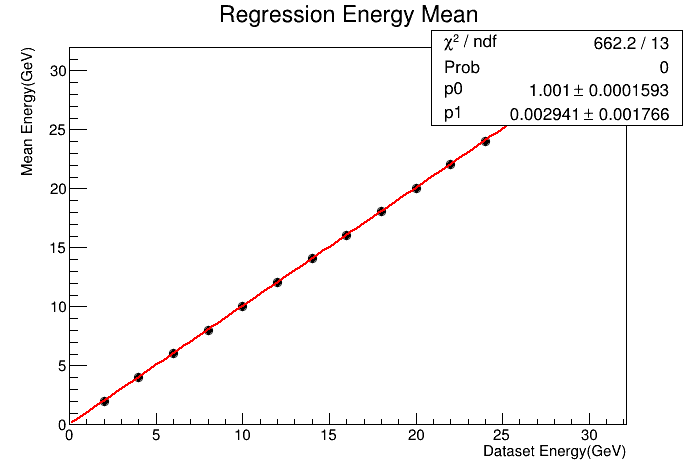

In [11]:
c_mean = r.TCanvas("c_mean")
g1_mean = result.Get("g1_mean")
f1_mean = r.TF1("f1_mean", "[0]*x+[1]", 0, 31000)
g1_mean.Fit("f1_mean")
g1_mean.Draw("AP")
c_mean.Draw()

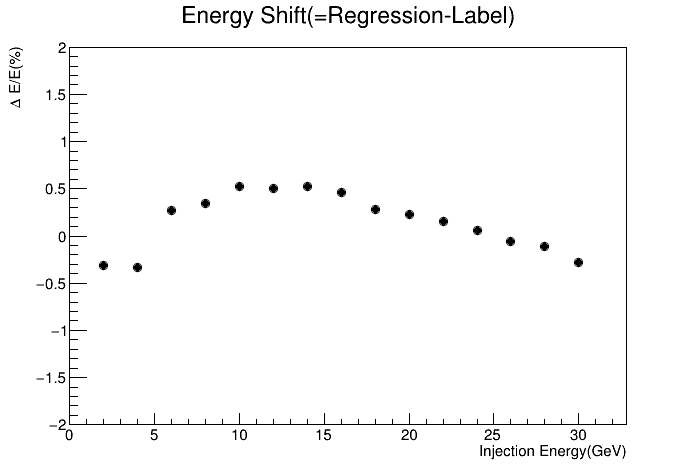

In [12]:
c_meanshift_energy_mape = r.TCanvas("c_meanshift_energy_mape")
g1_meanshift_energy_mape = result.Get("g1_meanshift_energy")
g1_meanshift_energy_mape.GetYaxis().SetTitle("#Delta E/E(%)")
g1_meanshift_energy_mape.GetXaxis().SetTitle("Injection Energy(GeV)")
g1_meanshift_energy_mape.GetYaxis().SetRangeUser(-2, 2)
g1_meanshift_energy_mape.Draw("AP")
c_meanshift_energy_mape.Draw()